In [1]:
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import sim.fitting
import sim.fitting_machinery
import sim.importing
import sim.log_similarity
import sim.replay_tracking
import sim.viz
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams.update({'figure.autolayout': True})
#plt.style.use('seaborn-pastel')
sns.set_context('notebook')
sns.set_style('darkgrid')

In [3]:
log, petrinet_model = sim.importing.load_input('reallife/bpi/RequestForPayment.xes.gz', 'request_for_payment_simplified_net.apnml')

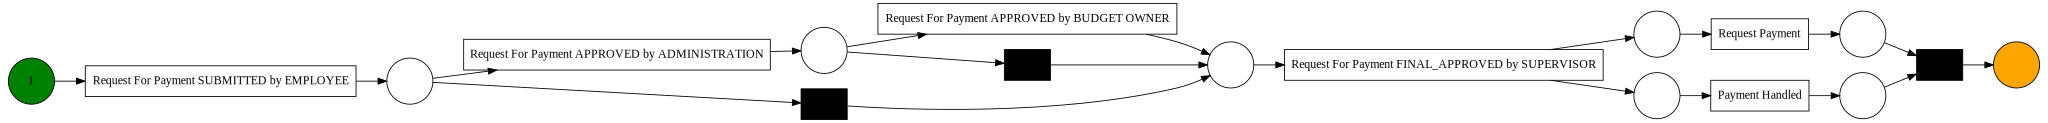

In [5]:
gg = sim.viz.visualize_petrinet(petrinet_model)
sim.viz.save_petrinet(gg, 'requestpayment_net.png')
gg

In [12]:
simulation_graph, replay_data = sim.fitting.pre_process_input(log, petrinet_model)

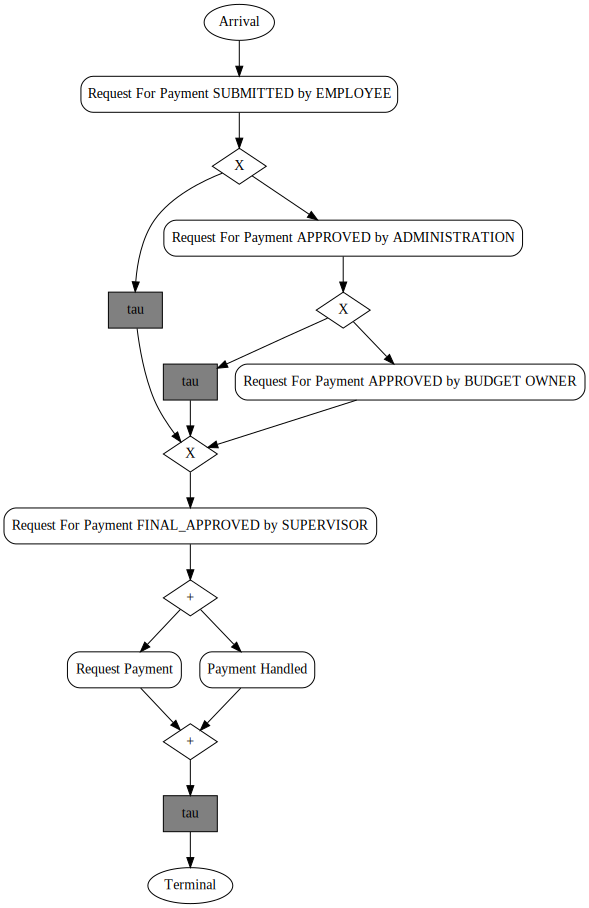

In [13]:
sim.viz.visualize_sim_graph(simulation_graph)

In [14]:
(hyper_parameters, model_configuration, simulated_log, replay_data2), score, score_list, individual_score_lists = sim.fitting.fit_preprocessed(log, petrinet_model, simulation_graph, replay_data, old=False, time_limit=datetime.timedelta(minutes=5))

Selecting modeling assumptions ModelingAssumptions(activity_assumptions={'Payment Handled': ActivityAssumptions(delay_guess=RelativeFractionalGuess(fraction=0.0), processing_guess=AbsoluteQuantileGuess(quantile=0.2)), 'Request For Payment APPROVED by ADMINISTRATION': ActivityAssumptions(delay_guess=RelativeFractionalGuess(fraction=0.0), processing_guess=AbsoluteQuantileGuess(quantile=0.2)), 'Request For Payment APPROVED by BUDGET OWNER': ActivityAssumptions(delay_guess=RelativeFractionalGuess(fraction=0.0), processing_guess=AbsoluteQuantileGuess(quantile=0.2)), 'Request For Payment FINAL_APPROVED by SUPERVISOR': ActivityAssumptions(delay_guess=RelativeFractionalGuess(fraction=0.0), processing_guess=AbsoluteQuantileGuess(quantile=0.2)), 'Request For Payment SUBMITTED by EMPLOYEE': ActivityAssumptions(delay_guess=RelativeFractionalGuess(fraction=0.0), processing_guess=AbsoluteQuantileGuess(quantile=0.2)), 'Request Payment': ActivityAssumptions(delay_guess=RelativeFractionalGuess(fraction

ValueError: Tz-aware datetime.datetime cannot be converted to datetime64 unless utc=True

In [ ]:
plt.plot(score_list)

In [ ]:
for k, vs in individual_score_lists.items():
    if isinstance(vs, dict):
        plt.legend()
        plt.show()
        for kk, vss in vs.items():
            plt.plot(vss, label=k + '_' + kk)
    else:
        plt.plot(vs, label=k)
plt.legend()
plt.show()

In [ ]:
print('final score', score)
print(hyper_parameters)
print(model_configuration)
print(simulated_log)

In [ ]:
sim.log_similarity.visual_loglang_emd(log, simulated_log)

In [ ]:
sim.log_similarity.visual_case_duration_emd(log, simulated_log)

In [ ]:
simulation_graph1, replay_data1 = sim.fitting.pre_process_input(log, petrinet_model)
simulation_graph2, replay_data2 = sim.fitting.pre_process_input(simulated_log, petrinet_model)

In [ ]:
sim.log_similarity.visual_arrivals(replay_data1, replay_data2)

In [ ]:
sim.log_similarity.visual_sojourn_durations(replay_data1, replay_data2, by='activity')

In [ ]:
sim.log_similarity.visual_concurrent_on_completion(replay_data1, replay_data2, by='resource')

In [ ]:
sim.log_similarity.visual_completions_bh(replay_data1, replay_data2, by='resource')

In [ ]:
df = replay_data1.trace_tracker.measurements_df
df_simulated = replay_data2.trace_tracker.measurements_df